# *`Mini Project 3 – Twitter Sentimental Analysis Using NLP and Python`*

**Scenario:**

By analyzing text data, we can find meaningful insights from non-numeric data that can help us achieve our objective. With the help of NLP and its concepts, we can do it. Twitter is one of the biggest platforms that people use to write their messages, express their feelings about a particular topic, and share knowledge in the form of text. By analyzing text data, we can make good decisions for different use cases like judging the sentiment of the human tweets, and any product review/comments can tell us the performance of a product in the market.

NLP allows us to study and understand the colinearity of the data. So we can predict our objective.

**Objective:**

Use Python libraries such as Pandas for data operations, Seaborn and Matplotlib for data visualization and EDA tasks, NLTK to extract and analyze the information, Sklearn for model building and performance visualization, to predict our different categories of people’s mindsets.

**Dataset description:** The data contain information about many Tweets in the form of text and their types, as mentioned below.

* **Tweets:** Data is in the form of a sentence written by individuals.
* **category:**
  1. Numeric (0: Neutral, -1: Negative, 1: Positive) (It is our dependent variable)

In [72]:
# Make necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from tensorflow.keras.layers import Dense, LSTM, Reshape, TextVectorization, Input

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Get the data

In [3]:
!wget https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/Mini_Project_3_Twitter_Sentiment_Analysis/Dataset/Twitter_Data.csv

--2024-03-18 10:40:51--  https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/Mini_Project_3_Twitter_Sentiment_Analysis/Dataset/Twitter_Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20895533 (20M) [text/plain]
Saving to: ‘Twitter_Data.csv’

Twitter_Data.csv    100%[===================>]  19.93M   106MB/s    in 0.2s    

2024-03-18 10:40:52 (106 MB/s) - ‘Twitter_Data.csv’ saved [20895533/20895533]



In [4]:
# Read the data into pandas dataframe
twitter_data = pd.read_csv('Twitter_Data.csv')
twitter_data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
# Change our dependent variable to categorical. ( 0 to “Neutral,” -1 to “Negative”, 1 to “Positive”)
category_mapping = {0: "Neutral", -1: "Negative", 1: "Positive"}

# Use the map function to map numerical values to categories
twitter_data['category'] = twitter_data['category'].map(category_mapping)

twitter_data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


In [6]:
twitter_data.shape

(162980, 2)

## Visualize some random sentences

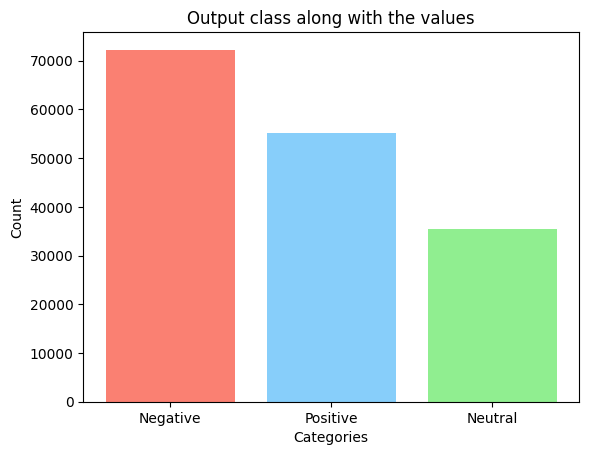

In [7]:
# Inspect the output column and check how many values are present for each class
plt.bar(['Negative', 'Positive', 'Neutral'], twitter_data['category'].value_counts(), color = ['salmon', 'lightskyblue', 'lightgreen'])
plt.title('Output class along with the values')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

In [8]:
# Print a random sentence and its assigned class
print('\nSample sentences along with labels:\n')
for i in range(5):
  random_index = np.random.randint(0, twitter_data.shape[0])
  text = twitter_data['clean_text'][random_index]
  label = twitter_data['category'][random_index]
  print(f'\nText {i + 1}:\n{text}\n\nLabel {i + 1}: {label}\n')


Sample sentences along with labels:


Text 1:
can understand menaka having care for her husband’ family but how can not furious about modi and other bjp monkeys abusing his grandmother and great grandfather every other day lost any respect for him even human being after the above tweet

Label 1: Positive


Text 2:
its all fine sir also really appreciate our shri modi

Label 2: Positive


Text 3:
point iaf jets crossed and dropped bombs mainland destroyed camps modi deserve full credit for calling pakistans nuclear bluff strikes terror pads response the new normal now

Label 3: Positive


Text 4:
idiots dont know that rajasthan modi more popular than guajrat

Label 4: Positive


Text 5:
hatred not one way path was already their but from the muslim side while after modi rule hindus started fighting against that
fyi when you have some revolutionary changes system will surely have some backlaehes like how liberalisation was done singh

Label 5: Positive



In [9]:
# Perform Missing value analysis and drop all null/missing values
twitter_data.isna().sum()
twitter_data.dropna(inplace=True)
twitter_data.shape

(162969, 2)

## Prepare the data/ Preprocessing the data

In [10]:
# Do text cleaning. (remove every symbol except alphanumeric, transform all words to lower case, and remove punctuation and stopwords )
def clean_text(text):

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stopwords_list = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stopwords_list]

    # Join the tokens back into a string
    clean_text = ' '.join(tokens)
    return clean_text

# Example sentence to check how our function works
sample_text = "Hello! This is an example text with symbols, punctuation, and stopwords."
cleaned_text = clean_text(sample_text)
print("Original text:", sample_text)
print("\nCleaned text:", cleaned_text)

Original text: Hello! This is an example text with symbols, punctuation, and stopwords.

Cleaned text: Hello example text symbols punctuation stopwords


In [11]:
# Lets remove the punctuations and stopwords from our data as well
twitter_data['clean_text'] = twitter_data['clean_text'].apply(clean_text)

In [12]:
# Create a new column and find the length of each sentence (how many words they contain)
twitter_data['sentence_length'] = twitter_data['clean_text'].apply(lambda x: len(x.split()))
twitter_data.head()

,clean_text,category,sentence_length
0,modi promised “ minimum government maximum gov...,Negative,23
1,talk nonsense continue drama vote modi,Neutral,6
2,say vote modi welcome bjp told rahul main camp...,Positive,13
3,asking supporters prefix chowkidar names modi ...,Positive,19
4,answer among powerful world leader today trump...,Positive,10


In [13]:
# Vizualize the average length of the sentences in the data
avg_len = sum(twitter_data['sentence_length'])/len(twitter_data['sentence_length'])
print(f'Avg length of sentences: {avg_len}')
print(f"Max length : {max(twitter_data['sentence_length'])}")
print(f"Min length :{min(twitter_data['sentence_length'])}")

Avg length of sentences: 14.514459805239033
Max length : 43
Min length :0


### Creating training and testing splits

In [68]:
# Split data into dependent(X) and independent(y) dataframe
X = twitter_data.drop('category', axis = 1)

# Create dummy variables for target variable
labels = pd.get_dummies(twitter_data['category'], dtype = 'float32')

# Perform train_test_split
X_train, X_test, y_train, y_test = train_test_split(X['clean_text'].values,
                                                    labels.values,
                                                    test_size = 0.2,
                                                    random_state = 42)

len(X_train), len(y_train), len(X_test), len(y_test)

(130375, 130375, 32594, 32594)

### Text vectorization: Converting the text into numbers.

* **Converting text data into numbers:** In natural language processing (NLP), machine learning algorithms require numerical input. However, text data consists of words and sentences, which are not directly usable by these algorithms. Therefore, we need to convert text data into numerical representations.

* **Using the TextVectorization layer of Keras:** Keras is a deep learning library that provides various building blocks for creating neural networks. The TextVectorization layer is a component in Keras that allows us to convert text data into numerical vectors. It performs tokenization (splitting text into words or tokens) and vectorization (converting tokens into numerical representations).

* **Converting into one-hot encoded array:** One-hot encoding is a technique used to represent categorical data, such as words in a text corpus, as binary vectors. In this representation, each word is represented by a vector where all elements are zeros except for one element, which is set to one. This element position corresponds to the index of the word in a predefined vocabulary. One-hot encoding is commonly used in NLP tasks to represent words in a format suitable for input into neural networks.

In [15]:
# Set the maximum sequence length
max_sequence_length = 50

# Create a TextVectorization layer with padding from the front side
vectorizer = tf.keras.layers.TextVectorization(output_mode='binary',
                                               max_tokens=10000,
                                               standardize = 'lower_and_strip_punctuation',
                                               split = 'whitespace',
                                               ngrams = None,
                                               pad_to_max_tokens=True)

# Adapt the TextVectorization layer to the text data
vectorizer.adapt(X_train)

In [16]:
# Get the unique words in the vocabulary
words_in_vocab = vectorizer.get_vocabulary() # Get all of the unique words in our training data found by the TextVectorizer
top_5_words = words_in_vocab[:5] # Get the most common words
bottom_5_words = words_in_vocab[-5:] # Get the least common words
print(f'Number of words in Vocab: {len(words_in_vocab)}')
print(f'5 most common words: {top_5_words}')
print(f'5 least common words: {bottom_5_words}')

Number of words in Vocab: 10000
5 most common words: ['[UNK]', 'modi', 'india', '’', 'bjp']
5 least common words: ['shishupal', 'sentences', 'semen', 'seena', 'secularists']


## Building the Model

### Creating performant data pipeline

In [69]:
batch_size = 1024

# Create an efficient and performant data pipeline for train data
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = train_data.shuffle(len(X_train)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Apply the same preprocessing to the test data
test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_data = test_data.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [25]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [26]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [71]:
# set random seed
tf.random.set_seed(42)

with tf.device('/GPU:0'):

  # Build an LSTM model and compile it (describe features, input length vocabulary size, information drop-out layer, activation function for output, )
  inputs = Input(shape=(1,), dtype=tf.string)
  x = vectorizer(inputs)
  x = Reshape((-1, 10000))(x)
  x = LSTM(units=64, dropout=0.2, recurrent_dropout=0.2, activation = 'tanh', unroll=True)(x)
  outputs = Dense(3, activation='softmax')(x)

  # Combine the inputs and outputs of the
  lstm_model = tf.keras.Model(inputs, outputs, name = 'LSTM_1')


  # Compile the model
  lstm_model.compile(optimizer=tf.keras.optimizers.Adam(),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

  # Fit the model
  lstm_model_history = lstm_model.fit(train_data,
                                      epochs = 20,
                                      steps_per_epoch = len(train_data),
                                      validation_data = test_data,
                                      validation_steps = int(len(test_data) * 0.15))

Epoch 1/20
128/128 [==============================] - 5s 31ms/step - loss: 0.8787 - accuracy: 0.6091 - val_loss: 0.6338 - val_accuracy: 0.7986
Epoch 2/20
128/128 [==============================] - 3s 25ms/step - loss: 0.5570 - accuracy: 0.8119 - val_loss: 0.4487 - val_accuracy: 0.8696
Epoch 3/20
128/128 [==============================] - 3s 26ms/step - loss: 0.4868 - accuracy: 0.8343 - val_loss: 0.4122 - val_accuracy: 0.8792
Epoch 4/20
128/128 [==============================] - 5s 33ms/step - loss: 0.4576 - accuracy: 0.8427 - val_loss: 0.3951 - val_accuracy: 0.8896
Epoch 5/20
128/128 [==============================] - 3s 25ms/step - loss: 0.4313 - accuracy: 0.8496 - val_loss: 0.3793 - val_accuracy: 0.8914
Epoch 6/20
128/128 [==============================] - 3s 25ms/step - loss: 0.4023 - accuracy: 0.8580 - val_loss: 0.3694 - val_accuracy: 0.8928
Epoch 7/20
128/128 [==============================] - 4s 29ms/step - loss: 0.3672 - accuracy: 0.8722 - val_loss: 0.3607 - val_accuracy: 0.8940

## Evaluate the model

In [73]:
# Evaluate the model on whole test data
lstm_model.evaluate(test_data)

32/32 [==============================] - 1s 17ms/step - loss: 0.3290 - accuracy: 0.9037


[0.3289790153503418, 0.9036939144134521]

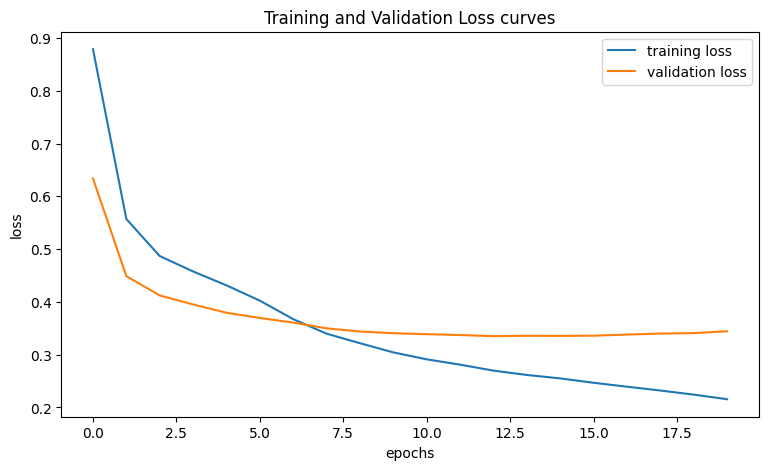

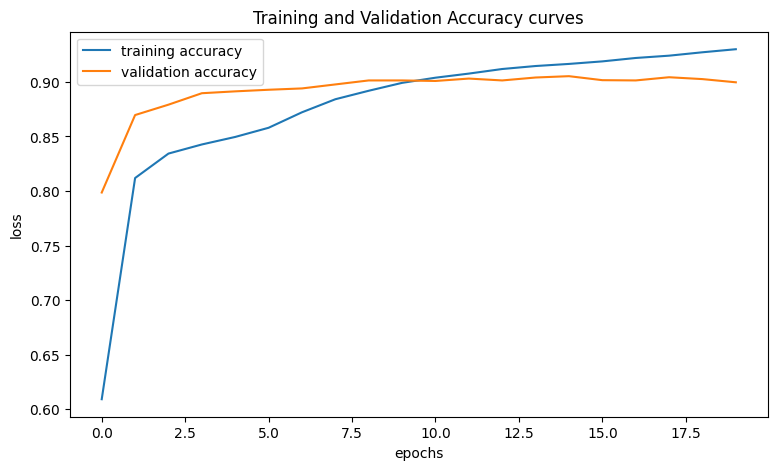

In [74]:
# Check the model's training and validation curves
plt.figure(figsize = (9, 5))
plt.plot(lstm_model_history.epoch, lstm_model_history.history['loss'], label = 'training loss')
plt.plot(lstm_model_history.epoch, lstm_model_history.history['val_loss'], label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and Validation Loss curves')
plt.legend()

plt.figure(figsize = (9, 5))
plt.plot(lstm_model_history.epoch, lstm_model_history.history['accuracy'], label = 'training accuracy')
plt.plot(lstm_model_history.epoch, lstm_model_history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and Validation Accuracy curves')
plt.legend()
plt.show()

* Normalize the prediction as same as the original data(prediction might be in decimal, so whoever is nearest to 1 is predicted as yes and set other as 0)
* Measure performance metrics and accuracy
* print Classification report

In [75]:
# Define a function to normalize the predictions
def normalize_predictions(predictions, threshold=0.5):
    """
    Normalize the predictions such that values above the threshold are set to 1 (yes),
    and values below or equal to the threshold are set to 0 (no).

    Args:
    - predictions: Array of predicted probabilities.
    - threshold: Threshold value to determine the cutoff for predicting yes or no.

    Returns:
    - Normalized predictions as binary values (0 or 1).
    """
    normalized_predictions = np.where(predictions > threshold, 1, 0)
    return normalized_predictions

In [76]:
# Make predictions on the test data
lstm_preds = lstm_model.predict(X_test)
y_preds = normalize_predictions(lstm_preds)
y_preds

1019/1019 [==============================] - 4s 4ms/step


array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [77]:
# Define a function to calculate the evalution metrics of the model
def evaluate_model_metrics(y_preds, y_true):
  "Returns the dictionary of the evaluation metrics such as Accuracy, Precision, F1 score"

  accuracy = accuracy_score(y_true = y_true,
                            y_pred = y_preds)

  precision, recall, f1_score, _ = precision_recall_fscore_support(y_true = y_true,
                                                                   y_pred = y_preds)

  metrics =  {'accuracy': np.round(accuracy, 3),
              'precision': np.round(precision, 3),
              'F1_score': np.round(f1_score, 3),
              'recall': np.round(recall, 3)}

  return metrics

In [78]:
# Print the evalution metrics of the model
model_results = evaluate_model_metrics(y_preds = y_preds,
                                       y_true = y_test)
model_results

{'accuracy': 0.899,
 'precision': array([0.865, 0.919, 0.919]),
 'F1_score': array([0.846, 0.927, 0.912]),
 'recall': array([0.828, 0.936, 0.905])}

In [79]:
# Print the classification report of the predictions
report = classification_report(y_true = y_test,
                               y_pred = y_preds)

print(f'The classification report of the model predictions:\n\n{report}')

The classification report of the model predictions:

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      7152
           1       0.92      0.94      0.93     11067
           2       0.92      0.91      0.91     14375

   micro avg       0.91      0.90      0.90     32594
   macro avg       0.90      0.89      0.90     32594
weighted avg       0.91      0.90      0.90     32594
 samples avg       0.90      0.90      0.90     32594



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
# Define a function to find the actual category of the predictions

def make_predictions(input_sentence, model):

  # Make prediction on the model
  pred_prob = model.predict([input_sentence])

  # Normalize the predictions
  pred = normalize_predictions(pred_prob)

  # Get the index of the maximum value in the prediction array
  predicted_index = np.argmax(pred)

  # Get the corresponding category from the dummy variables
  predicted_category = labels.columns[predicted_index]

  return predicted_category


In [110]:
# Classify the input tweet
input_text = "Heartiest congratulations to the RCB Women’s Team for winning the WPL. It would be a fantastic double if the RCB Men’s Team won the IPL which is long overdue. Good Luck."
print(f"\nInput Text:\n{input_text}\n\nPredicted category:\n{make_predictions(input_text, lstm_model)}")

1/1 [==============================] - 0s 31ms/step

Input Text:
Heartiest congratulations to the RCB Women’s Team for winning the WPL. It would be a fantastic double if the RCB Men’s Team won the IPL which is long overdue. Good Luck.

Predicted category:
Positive


In [123]:
input_text1 = "I do believe in making jokes come true"
print(f"\nInput Text:\n{input_text1}\n\nPredicted category:\n{make_predictions(input_text1, lstm_model)}")

1/1 [==============================] - 0s 57ms/step

Input Text:
I do believe in making jokes come true

Predicted category:
Positive


In [116]:
input_text2 = "A Nigerian official pretended to faint after he was asked about missing funds"
print(f"\nInput Text:\n{input_text2}\n\nPredicted category:\n{make_predictions(input_text2, lstm_model)}")

1/1 [==============================] - 0s 56ms/step

Input Text:
A Nigerian official pretended to faint after he was asked about missing funds

Predicted category:
Negative
